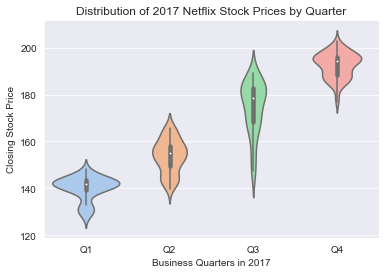

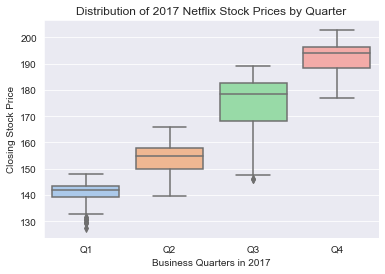

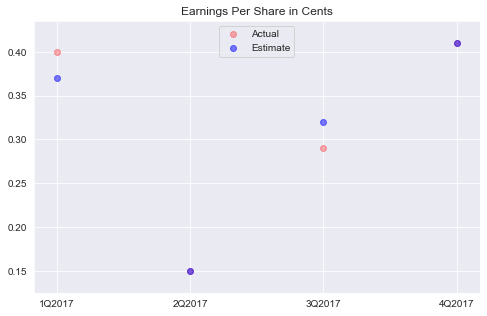

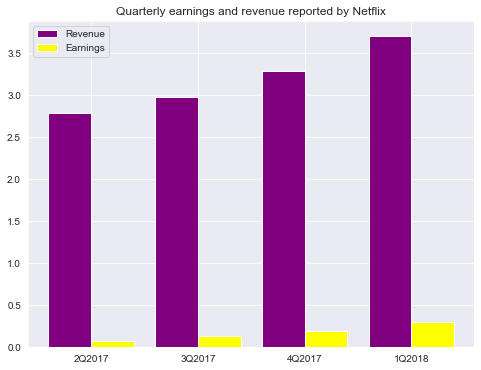

<Figure size 432x288 with 0 Axes>

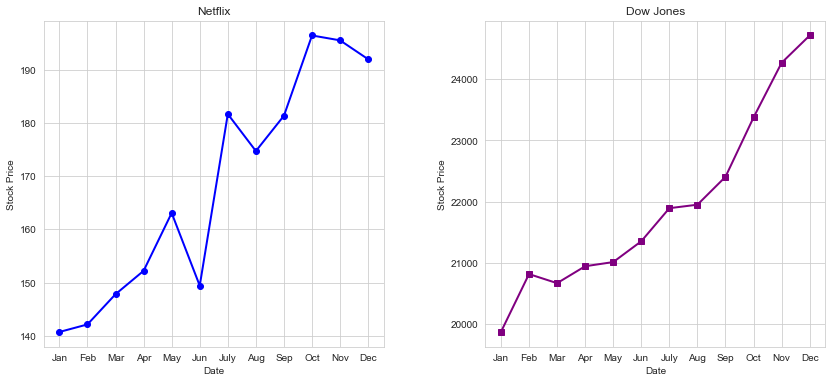

In [180]:

from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

netflix_stocks = pd.read_csv("NFLX.csv")
#print(netflix_stocks.head())

#netflix_stocks["Adj Close"] = adjusted close price adjusted for both dividends and splits.
dowjones_stocks = pd.read_csv("DJI.csv")
#print(dowjones_stocks.head())

#netflix quarterly
netflix_stocks_quarterly = pd.read_csv("NFLX_daily_by_quarter.csv ")
#print(netflix_stocks_quarterly.head())

#rename column "Adj Close" to "Price"
netflix_stocks.rename(columns={"Adj Close":"Price"},inplace=True)
dowjones_stocks.rename(columns={"Adj Close":"Price"},inplace=True)
netflix_stocks_quarterly.rename(columns={"Adj Close":"Price"},inplace=True)
#print(netflix_stocks.head())
#print(dowjones_stocks.head())
#print(netflix_stocks_quarterly.head())

#Quarterly stock performance Netflix

# Seaborn: violin and box plots

sns.set_style("darkgrid")
sns.set_palette("pastel")

ax = sns.violinplot() #instantiate a figure and give us access to the axes
sns.violinplot(data=netflix_stocks_quarterly, x="Quarter", y="Price")
ax.set_title("Distribution of 2017 Netflix Stock Prices by Quarter")
ax.set_xlabel("Business Quarters in 2017")
ax.set_ylabel("Closing Stock Price")
plt.show()

ax1 = sns.boxplot()
sns.boxplot(data=netflix_stocks_quarterly, x="Quarter", y="Price")
ax1.set_title("Distribution of 2017 Netflix Stock Prices by Quarter")
ax1.set_xlabel("Business Quarters in 2017")
ax1.set_ylabel("Closing Stock Price")
plt.show()

# performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for 
# the Quarter compared to the actual earnings for that quarters
# Matplotlib: scatter plot
x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual = [.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]
#overlapping datapoints 2Q and 4Q

plt.figure(figsize=(8,5))
ax12=plt.subplot()
ax12.scatter(x_positions,earnings_actual,color="red",alpha=0.3)
ax12.scatter(x_positions, earnings_estimate,color="blue",alpha=0.5)
ax12.legend(["Actual", "Estimate"], loc="upper center")
ax12.set_xticks(x_positions)
ax12.set_xticklabels(chart_labels)
ax12.set_title("Earnings Per Share in Cents")
plt.show()

# Matplotlib: Side-by-side histogram

# The metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

# Function to generate x values
def generate_x(n,t,d,w):
    return [t*x + w*n for x in range(d)]
bars1_x = generate_x(1, 2,4,0.8)   # Revenue
bars2_x  = generate_x(2, 2,4,0.8)  # Earnings


"""
n => single dataset (1, 2)
t => Number of dataset
d => Number of sets of bars
w => Width of each bar
"""
plt.figure(figsize=(8,6))
plt.bar(bars1_x, revenue_by_quarter, color="purple")
plt.bar(bars2_x, earnings_by_quarter, color="yellow")

# Calculate the middle of each two bars using list comp.
middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]

# Styling and labeling
labels = ["Revenue", "Earnings"]
plt.legend(labels)
plt.title("Quarterly earnings and revenue reported by Netflix")
plt.xticks(middle_x, quarter_labels)

plt.show()

plt.savefig("netflix_histogram.jpeg")

# Matplotlib: line plot (subplots)

# Compare Netflix stock to the Dow Jones Industrial Average in 2017

sns.set_style("whitegrid")
months = range(12)
months_name = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "July","Aug","Sep","Oct","Nov","Dec"]

# Left plot, Netflix
plt.figure(figsize=(14,6))
ax4 = plt.subplot(121)
plt.plot(netflix_stocks['Date'], netflix_stocks['Price'], color="blue", marker="o",linewidth=2)
ax4.set_title("Netflix")
ax4.set_xlabel("Date")
ax4.set_ylabel("Stock Price")
ax4.set_xticks(months)
ax4.set_xticklabels(months_name)

# Right plot, Dow Jones

ax5 = plt.subplot(122)
plt.plot(dowjones_stocks['Date'], dowjones_stocks['Price'], color="purple",marker="s",linewidth=2)
ax5.set_title("Dow Jones")
ax5.set_xlabel("Date")
ax5.set_ylabel("Stock Price")
ax5.set_xticks(months)
ax5.set_xticklabels(months_name)
plt.subplots_adjust(wspace=0.3)
plt.show()

